<a href="https://colab.research.google.com/github/pettersonAlberto/Actividad-Final/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

##pasamos el data set a un dataframe 

In [32]:
df = pd.read_csv('/content/car_purchasing.csv',encoding='ISO-8859-1')

##mostramos las primeras 5 filas

In [33]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


##obtenemos la informacion del data set

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [35]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


## obtenemos el numero de colummnas y filas 

In [36]:
df.shape

(500, 9)

In [37]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

## graficamos para para hacer una analisis explorativo 

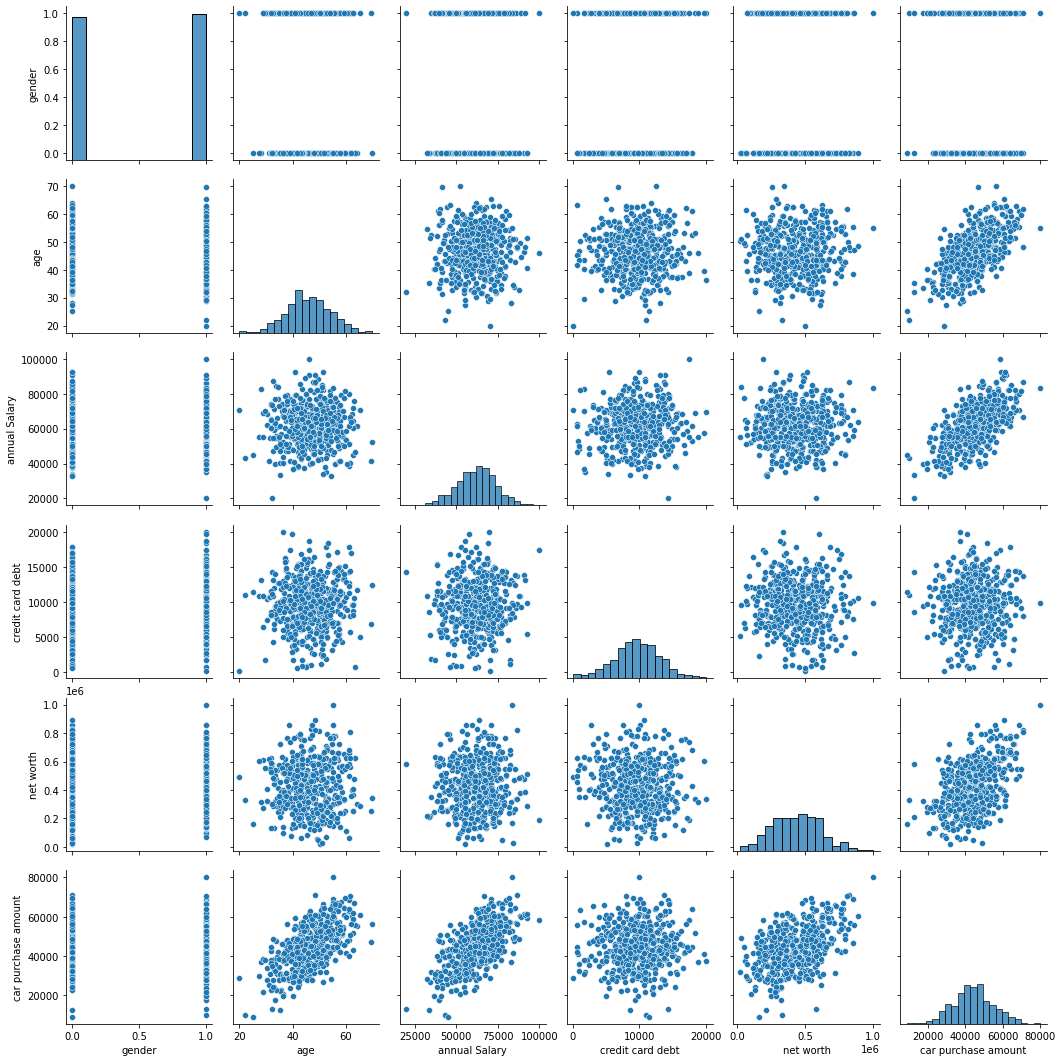

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)

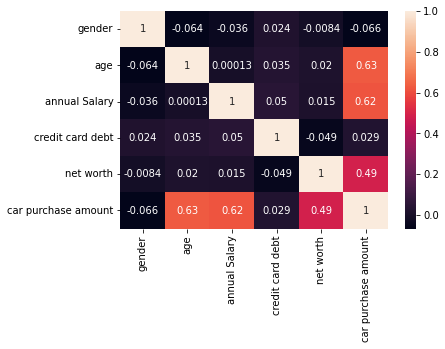

In [39]:
sns.heatmap(df.corr(), annot= True)

aqui nos damos cuenta que el monto toal de la compra del carro tiene una relacion muy fuerte con el salario anual 

## intercambiamos las columnas por las filas 

In [40]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
customer name,Martina Avila,Harlan Barnes,Naomi Rodriquez,Jade Cunningham,Cedric Leach,Carla Hester,Griffin Rivera,Orli Casey,Marny Obrien,Rhonda Chavez,...,Jonah,Merrill,Nolan,Winter,Rigel,Walter,Vanna,Pearl,Nell,Marla
customer e-mail,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,eu.dolor@diam.co.uk,vulputate.mauris.sagittis@ametconsectetueradip...,malesuada@dignissim.com,felis.ullamcorper.viverra@egetmollislectus.net,mi@Aliquamerat.edu,vehicula@at.co.uk,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Phasellus@sedsemegestas.org,nec@nuncest.com,...,augue@risusNuncac.co.uk,dolor.sit@turpisIn.com,Donec.at@neccursus.co.uk,egestas.urna.justo@maurissagittis.edu,egestas.blandit.Nam@semvitaealiquam.com,ligula@Cumsociis.ca,Cum.sociis.natoque@Sedmolestie.edu,penatibus.et@massanonante.com,Quisque.varius@arcuVivamussit.net,Camaron.marla@hotmail.com
country,Bulgaria,Belize,Algeria,Cook Islands,Brazil,Liberia,Syria,Czech Republic,Armenia,Somalia,...,Myanmar,Egypt,Latvia,Wallis and Futuna,Sao Tome and Principe,Nepal,Zimbabwe,Philippines,Botswana,marlal
gender,0,0,1,1,1,1,1,1,0,1,...,1,1,0,0,0,0,1,1,1,1
age,41.85172,40.870623,43.152897,58.271369,57.313749,56.824893,46.607315,50.193016,46.584745,43.323782,...,45.752698,50.197205,55.08772,42.900187,51.767418,41.462515,37.642,53.943497,59.160509,46.731152
annual Salary,62812.09301,66646.89292,53798.55112,79370.03798,59729.1513,68499.85162,39814.522,51752.23445,58139.2591,53457.10132,...,63722.00164,78518.21527,72424.80112,77665.17195,77345.61633,71942.40291,56039.49793,68888.77805,49811.99062,61370.67766
credit card debt,11609.38091,9572.957136,11160.35506,14426.16485,5358.712177,14179.47244,5958.460188,10985.69656,3440.823799,12884.07868,...,10711.44472,10072.48298,9831.184792,13308.87932,6736.75168,6995.902524,12301.45679,10611.60686,14013.03451,9391.341628
net worth,238961.2505,530973.9078,638467.1773,548599.0524,560304.0671,428485.3604,326373.1812,629312.4041,630059.0274,476643.3544,...,316128.4002,294506.0844,523680.7699,349588.5608,665099.139,541670.1016,360419.0988,764531.3203,337826.6382,462946.4924
car purchase amount,35321.45877,45115.52566,42925.70921,67422.36313,55915.46248,56611.99784,28925.70549,47434.98265,48013.6141,38189.50601,...,41352.47071,52785.16947,60117.67886,47760.66427,64188.26862,48901.44342,31491.41457,64147.28888,45442.15353,45107.22566


obtenemos los valores unicos de la columna country 

In [41]:
df['country'].nunique()

211

## hacemos una lisa con la suma de valores nulos en el data frame 

In [42]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

creamos un data frame pero ahora eliminando las columnas de nombre y email ya que no nos sirven para nada 

In [43]:
cocl = df.drop(['customer name','customer e-mail'],axis=1)

In [44]:
cocl.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## dividimos los datos en X y Y


In [52]:
X=cocl.drop(['country','car purchase amount'],axis=1)
y = cocl['car purchase amount']

##creamos los datos de prueba y entrenamiento 

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## creamos el modelo de regresion lineal 

In [54]:
lm = LinearRegression()

## le damos los datos de entrenamiento al modelo 

In [55]:
lm.fit(X_train,y_train)

LinearRegression()

## hacemos las predicciones 

In [56]:
predict_lm = lm.predict(X_test)

##comparamso resultados 

In [57]:
result = pd.DataFrame({'real': y_test, 'prediccion': predict_lm})
result

,real,prediccion
18,44633.99241,44634.360449
361,46082.80993,46084.365278
104,60461.24268,60460.909601
4,55915.46248,55913.095535
156,26499.31418,26502.186078
...,...,...
147,47935.93940,47935.628074
346,32291.18978,32291.848358
423,49568.47685,49569.591269
17,43901.71244,43904.351792


##imprimimos nuestras metricas 

In [58]:
print(f'Mean Absolute Error:{mean_absolute_error(y_test,predict_lm)}')
print(f'Mean Squared Error:{mean_squared_error(y_test,predict_lm)}')
print(f'R2 Score:{r2_score(y_test,predict_lm)}')

Mean Absolute Error:1.1837468602129835
Mean Squared Error:2.119653235862661
R2 Score:0.9999999783421094
